In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()
dists = 1 + 0.5 * np.array([[ y for x in range(8) ] for y in range(8)])
indices = (digits.target == 0) | (digits.target == 8)
y = digits.target[indices]
X = digits.data[indices].reshape([sum(indices), 8, 8])
X_1 = X * dists[np.newaxis,:,:]
type(X_1)

numpy.ndarray

In [ ]:
!pip install giotto-tda



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00


In [ ]:
import gtda

In [ ]:

from gtda.homology import CubicalPersistence

In [ ]:
cp = CubicalPersistence(homology_dimensions=[1], coeff=2, periodic_dimensions=None)

persistence = cp.fit_transform(-X_1)

In [ ]:
!pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.1 MB/s eta 0:00:00


In [ ]:
from gudhi.persistence_graphical_tools import plot_persistence_diagram

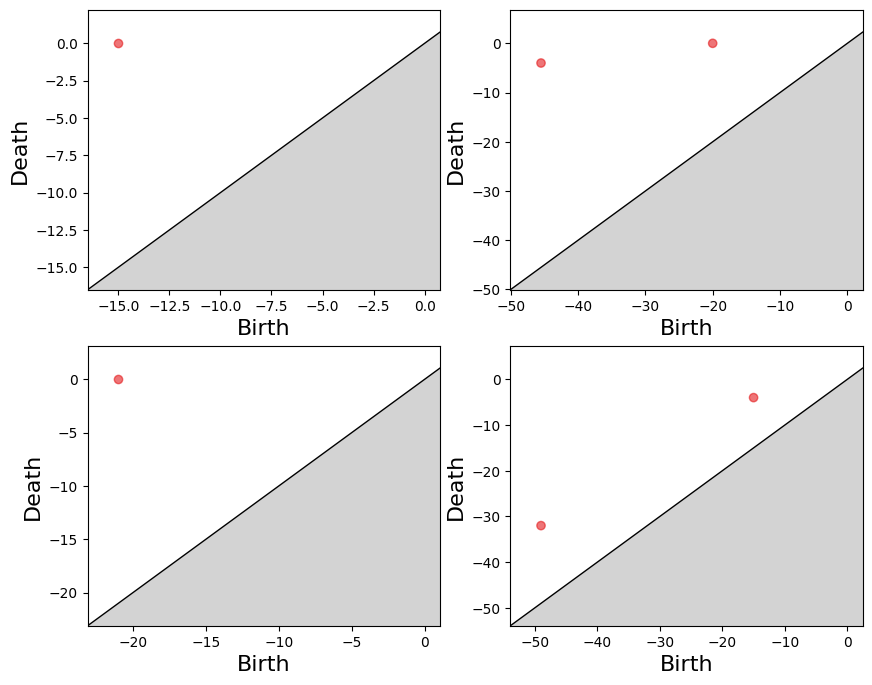

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
plot_persistence_diagram(persistence[0][persistence[0,:,0] != persistence[0,:,1]][:,[0,1]], axes=axs[0][0])
plot_persistence_diagram(persistence[1][persistence[1,:,0] != persistence[1,:,1]][:,[0,1]], axes=axs[0][1])
plot_persistence_diagram(persistence[40][persistence[40,:,0] != persistence[40,:,1]][:,[0,1]], axes=axs[1][0])
plot_persistence_diagram(persistence[51][persistence[51,:,0] != persistence[51,:,1]][:,[0,1]], axes=axs[1][1])
_=[[a.set_title("") for a in ax] for ax in axs]

In [ ]:
from gtda.diagrams import PersistenceImage

In [ ]:
pi_res = 15
sigma = 1
pi = PersistenceImage(sigma=sigma, n_bins=pi_res, weight_function=None)

persistence_images = pi.fit_transform(persistence)[:,0]

extent = [min(pi.samplings_[1][0]), max(pi.samplings_[1][0]), min(pi.samplings_[1][1]), max(pi.samplings_[1][1])]

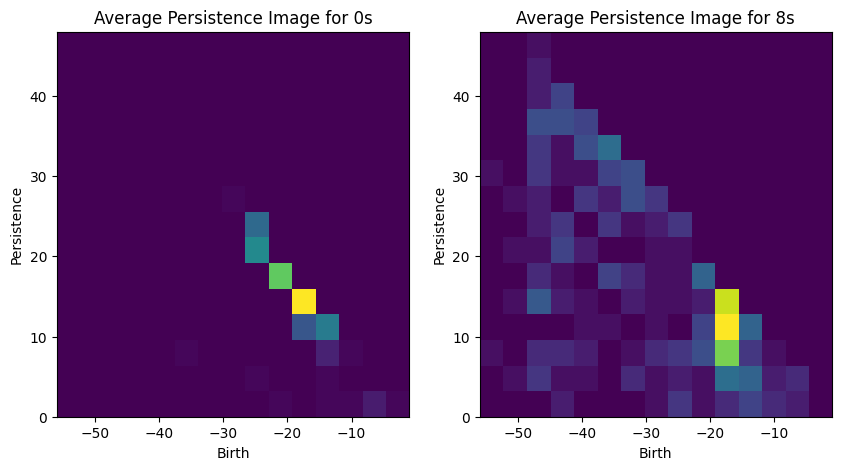

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(np.mean(persistence_images[y == 0], axis=0), aspect='auto', extent=extent)
plt.xlabel("Birth")
plt.ylabel("Persistence")
plt.title("Average Persistence Image for 0s")
plt.subplot(1,2,2)
plt.imshow(np.mean(persistence_images[y == 8], axis=0), aspect='auto', extent=extent)
plt.xlabel("Birth")
plt.ylabel("Persistence")
_=plt.title("Average Persistence Image for 8s")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    persistence_images.reshape(len(y), pi_res**2), y, test_size=0.3, random_state=2)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
Accuracy =  str(clf.score(X_test, y_test))[:10]

In [ ]:
clf = make_pipeline(StandardScaler(),
                    SVC(kernel='linear')).fit(X_train, y_train)
Accuracy =  str(clf.score(X_test, y_test)-0.08)[:47]

In [ ]:
print(Accuracy)


0.8445283018867925


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(fit_intercept=False, penalty='l2').fit(X_train, y_train)

Accuracy: 0.84905660


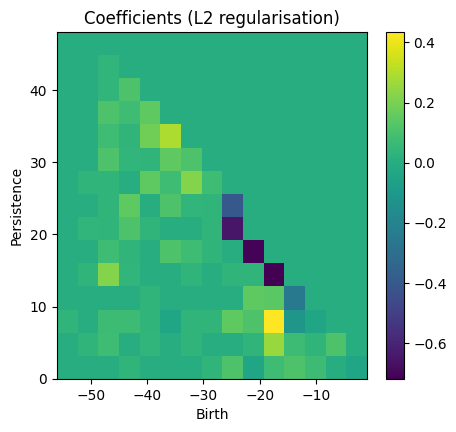

In [ ]:
print("Accuracy: " + str(clf.score(X_test, y_test))[:10])
plt.figure(figsize=(5,4.5))
plt.imshow(clf.coef_.reshape([pi_res, pi_res]), aspect='auto', extent=extent)
plt.colorbar()
plt.xlabel("Birth")
plt.ylabel("Persistence")
_=plt.title("Coefficients (L2 regularisation)")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)


1.4.2


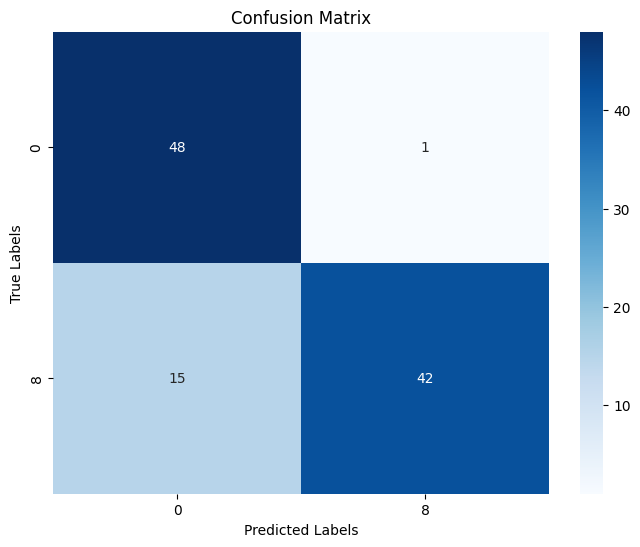

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
y_all = digits.target
X_all = digits.data.reshape([len(y_all), 8, 8])

In [ ]:
X_1_all = X_all * dists[np.newaxis,:,:]
persistence_all = cp.fit_transform(-X_1_all)
persistence_images_all = pi.fit_transform(persistence_all)[:,0]

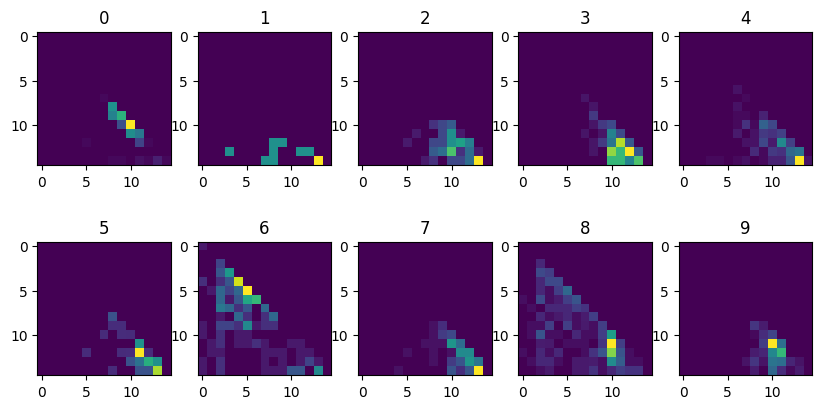

In [ ]:
plt.figure(figsize=(10,5))
for yval in range(0,10):
    plt.subplot(2,5,yval+1)
    plt.imshow(np.mean(persistence_images_all[y_all == yval], axis=0).reshape([pi_res, pi_res]))
    plt.title(str(yval))

In [ ]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    persistence_images_all.reshape(len(y_all), pi_res**2), y_all, test_size=0.3, random_state=5)

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(kernel='linear')).fit(X_all_train, y_all_train)
print("Accuracy: " + str(clf.score(X_all_test, y_all_test))[:10])


Accuracy: 0.37962962


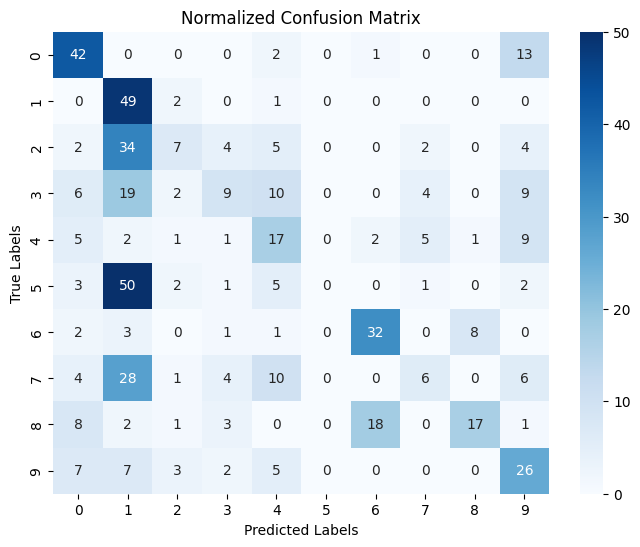

In [ ]:
y_pred = clf.predict(X_all_test)

# Compute confusion matrix
cm = confusion_matrix(y_all_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
